## Handwritten digit (MNIST) prediction using CNN in Tensorflow with Keras

### Inport libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load MNIST dataset from keras library

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = np.max(y_train)+1
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

print("{} digit classes: ({} to {})".format(num_classes, np.min(y_train), np.max(y_train)))
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

10 digit classes: (0 to 9)
60000 train samples
10000 test samples


### Display sample training images

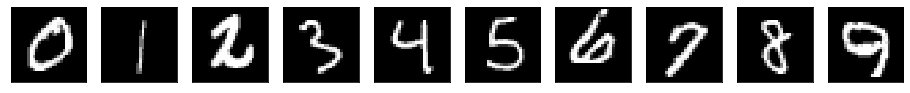

In [3]:
fig=plt.figure(figsize=(16,16))
rows = 1
cols = 10
for i in range(1,rows*cols+1):
    img = i
    while y_train[img] != i-1: 
        img = np.random.randint(len(x_train))
    fig.add_subplot(rows, cols, i)
    plt.imshow(x_train[img].reshape((28, 28)).astype(int), cmap=plt.get_cmap('gray'))
    plt.xticks([]), plt.yticks([])

### Display sample test images

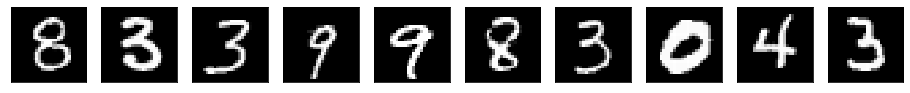

In [4]:
fig=plt.figure(figsize=(16,16))
rows = 1
cols = 10
for i in range(1,rows*cols+1):
    img = np.random.randint(len(x_train))
    fig.add_subplot(rows, cols, i)
    plt.imshow(x_train[img].reshape((28, 28)).astype(int), cmap=plt.get_cmap('gray'))
    plt.xticks([]), plt.yticks([])

### Reshape dataset for CNN layer

In [5]:
# The original dataset has the shape of 60000 X 28 X 28 and "float64" type
# Reshape this of None X rowsX cols X channel i.e 60000 X 28 X 28 X 1
# Also convert them to "float32" type to compatible in Keras 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("x_train shape: ", x_train.shape)

x_train shape:  (60000, 28, 28, 1)


### One hot encoding

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the CNN squential model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=(img_rows*img_cols,)))
#model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

### Hyperparameter and complie the model

In [8]:
batch_size = 128
epochs = 10
lr = 0.001

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=lr),
              metrics=['accuracy'])

### Train the model

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1840 - acc: 0.9430 - val_loss: 0.0466 - val_acc: 0.9852
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0500 - acc: 0.9847 - val_loss: 0.0390 - val_acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0337 - acc: 0.9891 - val_loss: 0.0302 - val_acc: 0.9900
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0277 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0262 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0110 - acc: 0.9967 - val_loss: 0.0358 - val_acc

### Save the model

In [10]:
model.save('weights/mnist_cnn.h5')

### Evaluate the model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03138327941669199
Test accuracy: 0.9921


### Test the model with new set of examples

In [12]:
# Load the model
from keras.models import load_model
loaded_model = load_model("weights/mnist_cnn.h5")
print("Model loaded.....")

Model loaded.....


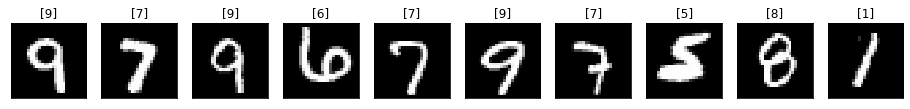

In [14]:
# dispaly the prediciton result of 10 random examples
idx = np.random.randint(0, len(x_test), 10)

fig=plt.figure(figsize=(16,16))
row = 1
col = 10
for i in range(1, row*col+1):
    img = ((x_test[idx[i-1]]*255.0).reshape(28,28)).astype(int)
    pred = loaded_model.predict_classes(x_test[idx[i-1]].reshape(1,28,28,1))
    
    fig.add_subplot(row, col, i)
    plt.imshow(img, cmap="gray")
    plt.title(pred)
    plt.xticks([])
    plt.yticks([])
plt.show()